## Import necessary libraries 

In [1]:
import glob
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import plotly.express as px
import random
import plotly.figure_factory as ff

# Data loading and exploration 

In [2]:
product_df = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
district_df =pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")


In [3]:
path = "/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data"
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    
engagement_df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
# Shape of the data files ( number of rows and number of columns) 
print('\033[1m'"Shape of the Engagement File "'\033[0m',engagement_df.shape )
print('\033[1m'"Shape of the District file"'\033[0m', district_df.shape)
print('\033[1m'"Shape of the Product File"'\033[0m',product_df.shape)

Shape of the Engagement File  (22324190, 4)
Shape of the District file (233, 7)
Shape of the Product File (372, 6)


In [5]:
engagement_df.head(10).style.set_caption("Engagement Dataframe").set_properties(**{'background-color': 'black',
                           'color': 'lawngreen','border': '1.5px  solid white'})

,time,lp_id,pct_access,engagement_index
0,2020-01-01,92844.000000,0.010000,0.680000
1,2020-01-01,64838.000000,0.010000,0.680000
2,2020-01-01,94058.000000,0.000000,nan
3,2020-01-01,26488.000000,0.030000,26.210000
4,2020-01-01,32340.000000,0.010000,0.110000
5,2020-01-01,95731.000000,0.200000,40.960000
6,2020-01-01,92918.000000,0.010000,4.540000
7,2020-01-01,17307.000000,0.000000,nan
8,2020-01-01,96255.000000,0.010000,0.110000
9,2020-01-01,83862.000000,0.010000,0.110000


In [6]:
district_df.head(10).style.set_caption("District Dataframe").set_properties(**{'background-color': 'black',
                           'color': 'lawngreen','border': '1.5px  solid white'})

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,nan,nan,nan,nan,nan,nan
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,nan,nan,nan,nan,nan,nan
4,2238,nan,nan,nan,nan,nan,nan
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
8,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
9,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[0.18, 1[","[8000, 10000["


In [7]:
product_df.head(10).style.set_caption("Product Dataframe").set_properties(**{'background-color': 'black',
                           'color': 'lawngreen','border': '1.5px  solid white'})

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Simulations"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming Services"


In [8]:
print('\033[1m'"Data types of each column in district data file\n"'\033[0m',district_df.dtypes)
print('\033[1m'"Data types of each column in product data file\n"'\033[0m',product_df.dtypes)
print('\033[1m'"Data types of each column in engagement data file\n"'\033[0m',engagement_df.dtypes)

Data types of each column in district data file
 district_id                  int64
state                       object
locale                      object
pct_black/hispanic          object
pct_free/reduced            object
county_connections_ratio    object
pp_total_raw                object
dtype: object
Data types of each column in product data file
 LP ID                          int64
URL                           object
Product Name                  object
Provider/Company Name         object
Sector(s)                     object
Primary Essential Function    object
dtype: object
Data types of each column in engagement data file
 time                 object
lp_id               float64
pct_access          float64
engagement_index    float64
dtype: object


#  Missing values 

In [9]:
# Missing Value check
print('\033[1m'"Missing value present in each column of district data file\n"'\033[0m',district_df.isna().any())
print('\033[1m'"Missing value present in each column of product data file\n"'\033[0m',product_df.isna().any())
print('\033[1m'"Missing value present in each column of engagement data file\n"'\033[0m',engagement_df.isna().any())


Missing value present in each column of district data file
 district_id                 False
state                        True
locale                       True
pct_black/hispanic           True
pct_free/reduced             True
county_connections_ratio     True
pp_total_raw                 True
dtype: bool
Missing value present in each column of product data file
 LP ID                         False
URL                           False
Product Name                  False
Provider/Company Name          True
Sector(s)                      True
Primary Essential Function     True
dtype: bool
Missing value present in each column of engagement data file
 time                False
lp_id                True
pct_access           True
engagement_index     True
dtype: bool


## Missing Values count

In [10]:
#Missing value count  
print('\033[1m'"Missing value count in each column of district data file\n"'\033[0m',district_df.isna().sum())
print('\033[1m'"Missing value count in each column of product data file\n"'\033[0m',product_df.isna().sum())
print('\033[1m'"Missing value count in each column of engagement data file\n"'\033[0m',engagement_df.isna().sum())

Missing value count in each column of district data file
 district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64
Missing value count in each column of product data file
 LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64
Missing value count in each column of engagement data file
 time                      0
lp_id                   541
pct_access            13447
engagement_index    5378409
dtype: int64


## Visualizing Missing values 

Using heatMap below to find the correlation between the missing values 
- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

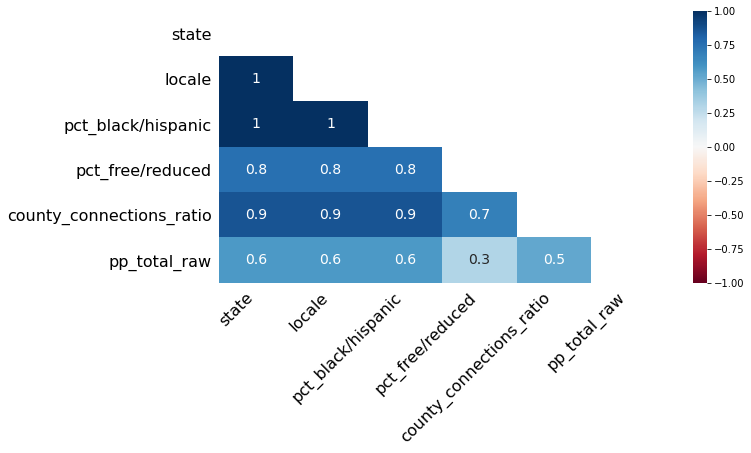

In [11]:
# Visualize missing values as a matrix

msno.heatmap(district_df,figsize=(10,5))

<AxesSubplot:>

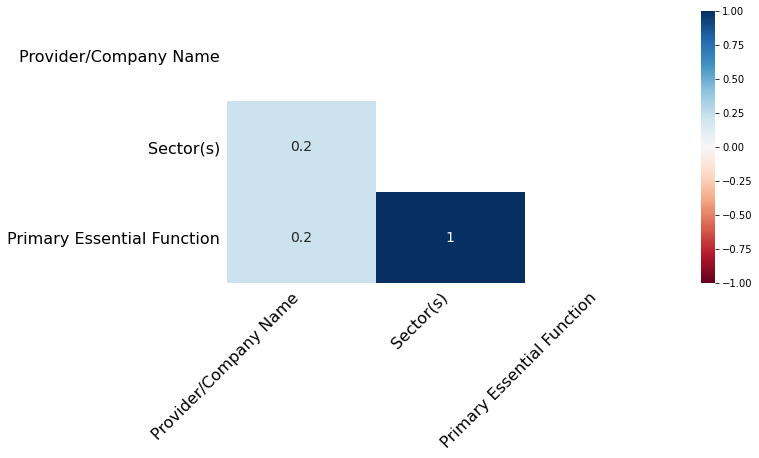

In [12]:
# Visualize the correlation between the number of missing values in different columns as a heatmap

msno.heatmap(product_df,figsize=(10,5))

<AxesSubplot:>

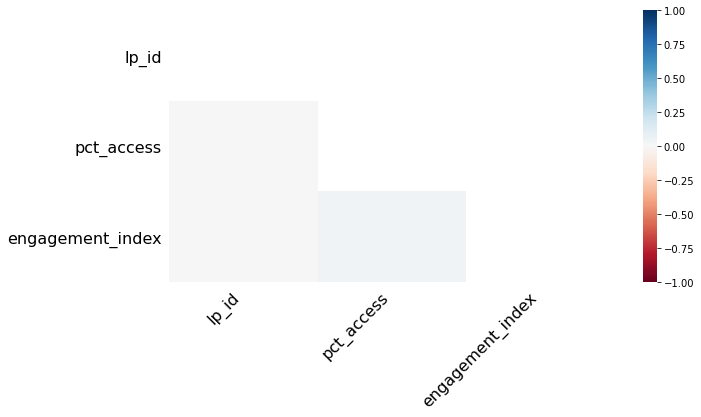

In [13]:
# Visualize the correlation between the number of missing values in different columns as a heatmap

msno.heatmap(engagement_df,figsize=(10,5))

## Handling Missing Values

In [14]:
# Dropping the values from the states column which are in district dataframe
district_df = district_df[district_df['state'].notna()].reset_index(drop=True)


In [15]:
# Rechecking the no of missing values in the district column

district_df.isna().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            28
county_connections_ratio    14
pp_total_raw                58
dtype: int64

# Visualization the District dataframe 

In [16]:
#First Five records 

fig = ff.create_table(district_df.head(5),height_constant=50)
fig.update_layout(width=3500, height=400)
fig.show()

In [17]:
#Last five records 

colorscale = [[0, 'red'],[.5, '#DCE775'],[1, '#C0CA33']]
font=['white', '#212121' , 'red']
fig = ff.create_table(district_df.tail(5),height_constant=50,colorscale=colorscale,font_colors=font)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 17
fig.update_layout(width=4500, height=400)
fig.show()


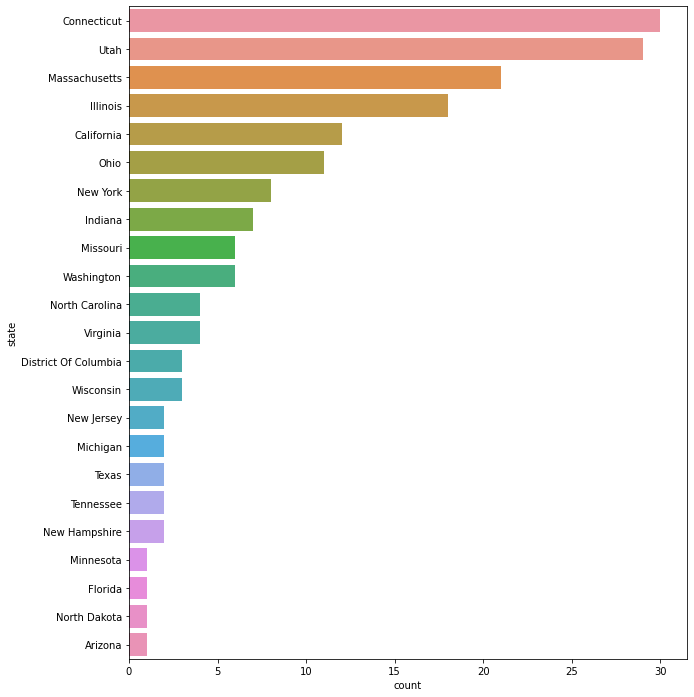

In [18]:
# Count of each states in the dataframe
plt.figure(figsize=(10,12))
sns.countplot(y ='state',data = district_df,order=district_df['state'].value_counts().index)
plt.show()

In [19]:
#Simple Pie Chart
#marks = [48 , 30 , 20 , 15]
status = ['Connecticut' , 'Utah' , 'Massachusetts' , 'Illinois','California','Ohio','New York','Indiana','Missouri','Washington','Virginia','North Carolina','Wisconsin','District Of Columbia','Texas','New Jersey','New Hampshire','Michigan','Tennessee','Arizona','North Dakota','Florida','Minnesota']
data = go.Pie(
values= district_df["state"].value_counts(),
labels= status,
)
layout = go.Layout(
title=dict(text = "State",x=0.46,y=0.95,font_size=20)
)
fig = go.Figure(data=data,layout=layout)
fig.show()

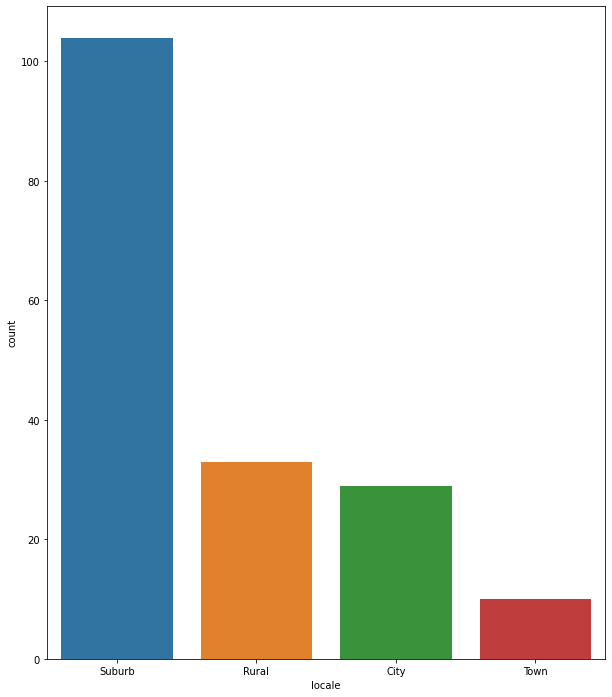

In [20]:
# Count of each locale in the dataframe
plt.figure(figsize=(10,12))
sns.countplot(x ='locale',data = district_df,order=district_df['locale'].value_counts().index)
plt.show()

In [21]:
status = ['Suburb','Rural','City','Town']
colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']
data = go.Pie(
values= district_df["state"].value_counts(),
labels= status,
marker=dict(colors=colors),
textinfo='label+value+percent'
)
layout = go.Layout(
title=dict(text = "State",x=0.46,y=0.95,font_size=20)
)
fig = go.Figure(data=data,layout=layout)
fig.show()

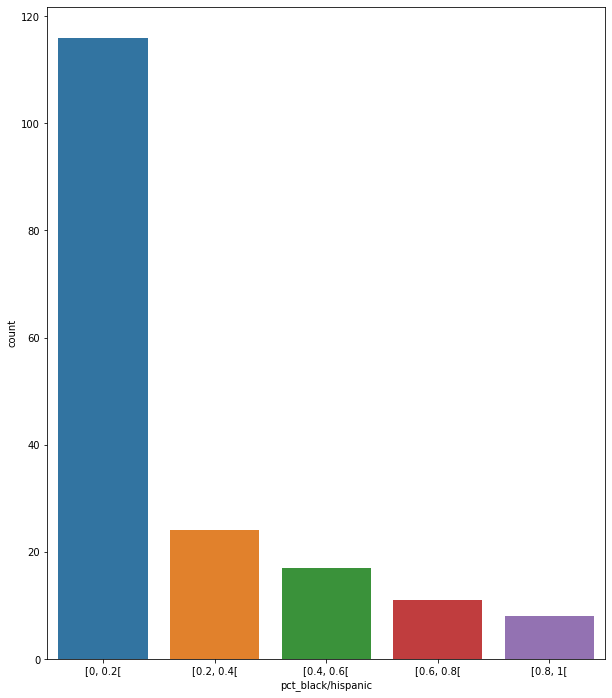

In [22]:
# Count of each pct_black/hispanic in the dataframe
plt.figure(figsize=(10,12))
sns.countplot(x ='pct_black/hispanic',data = district_df,order=district_df['pct_black/hispanic'].value_counts().index)
plt.show()

In [23]:
status = ['[0, 0.2[','[0.2, 0.4[','[0.4, 0.6[','[0.6, 0.8[','[0.8, 1[']
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']
data = go.Pie(
values= district_df["pct_black/hispanic"].value_counts(),
labels= status,
marker=dict(colors=colors),
textinfo='label+value+percent'
)
layout = go.Layout(
title=dict(text = "State",x=0.46,y=0.95,font_size=20)
)
fig = go.Figure(data=data,layout=layout)
fig.show()

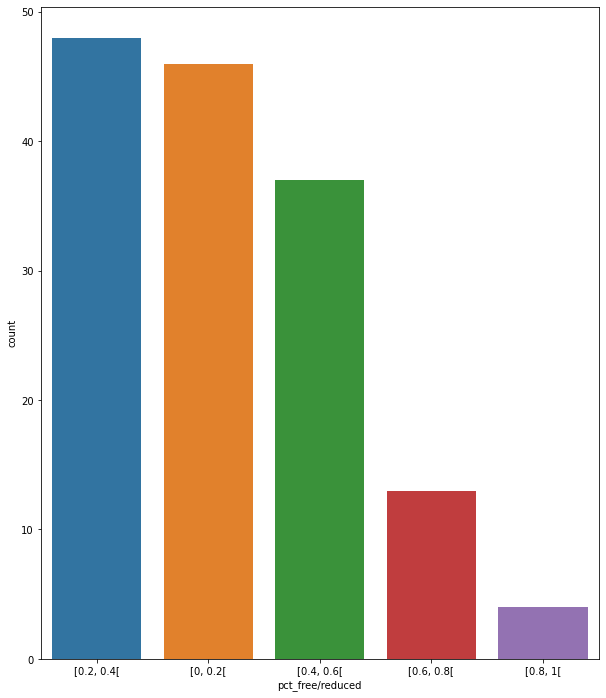

In [24]:
#count of pct_free/reduced in the district dataframe

plt.figure(figsize=(10,12))
sns.countplot(x ='pct_free/reduced',data = district_df,order=district_df['pct_free/reduced'].value_counts().index)
plt.show()

In [25]:
status = ['[0, 0.2[','[0.2, 0.4[','[0.4, 0.6[','[0.6, 0.8[','[0.8, 1[']
colors = ['#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
data = go.Pie(
values= district_df["pct_black/hispanic"].value_counts(),
labels= status,
marker=dict(colors=colors),
textinfo='label+value+percent'
)
layout = go.Layout(
title=dict(text = "State",x=0.46,y=0.95,font_size=20)
)
fig = go.Figure(data=data,layout=layout)
fig.show()

In [26]:
status = ['[0.18, 1[','[1,2[']
colors = ['#17becf', '#E1396C']
data = go.Pie(
values= district_df["county_connections_ratio"].value_counts(),
labels= status,
marker=dict(colors=colors),
textinfo='label+value+percent'
)
layout = go.Layout(
title=dict(text = "State",x=0.46,y=0.95,font_size=20)
)
fig = go.Figure(data=data,layout=layout)
fig.show()

In [27]:
#pp_total_raw

district_df["pp_total_raw"].value_counts()

[8000, 10000[     30
[10000, 12000[    17
[12000, 14000[    15
[14000, 16000[    15
[16000, 18000[    13
[6000, 8000[      13
[18000, 20000[     8
[22000, 24000[     2
[4000, 6000[       2
[20000, 22000[     2
[32000, 34000[     1
Name: pp_total_raw, dtype: int64

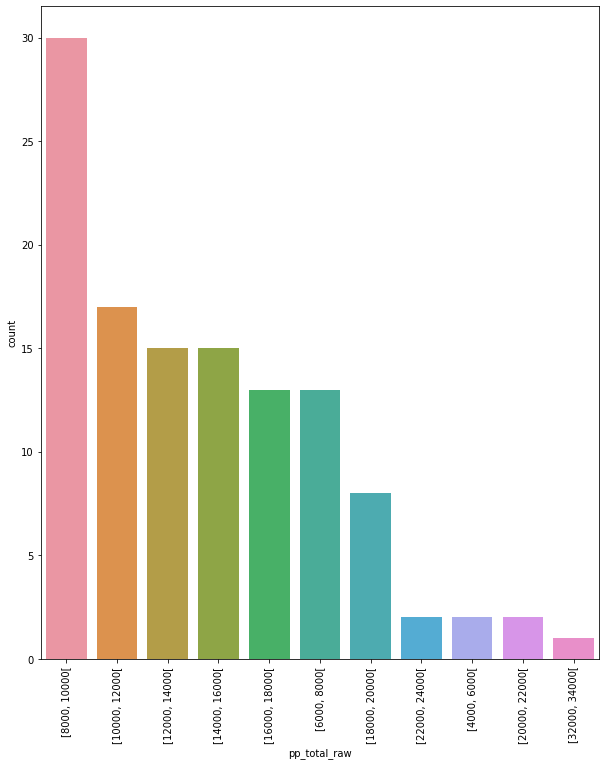

In [28]:
#count of pp_total_raw in the district dataframe

plt.figure(figsize=(10,12))
sns.countplot(x ='pp_total_raw',data = district_df,order=district_df['pp_total_raw'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [29]:
status = ['[8000, 10000[','[10000, 12000[','[14000, 16000[','[12000, 14000[','[6000, 8000[','[16000, 18000[','[18000, 20000[','[20000, 22000[','[22000, 24000[','[4000, 6000[','[32000, 34000[']
colors = ['#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#E1396C']
data = go.Pie(
values= district_df["pp_total_raw"].value_counts(),
labels= status,
marker=dict(colors=colors),
textinfo='label+value+percent'
)
layout = go.Layout(
title=dict(text = "State",x=0.46,y=0.95,font_size=20)
)
fig = go.Figure(data=data,layout=layout)
fig.show()

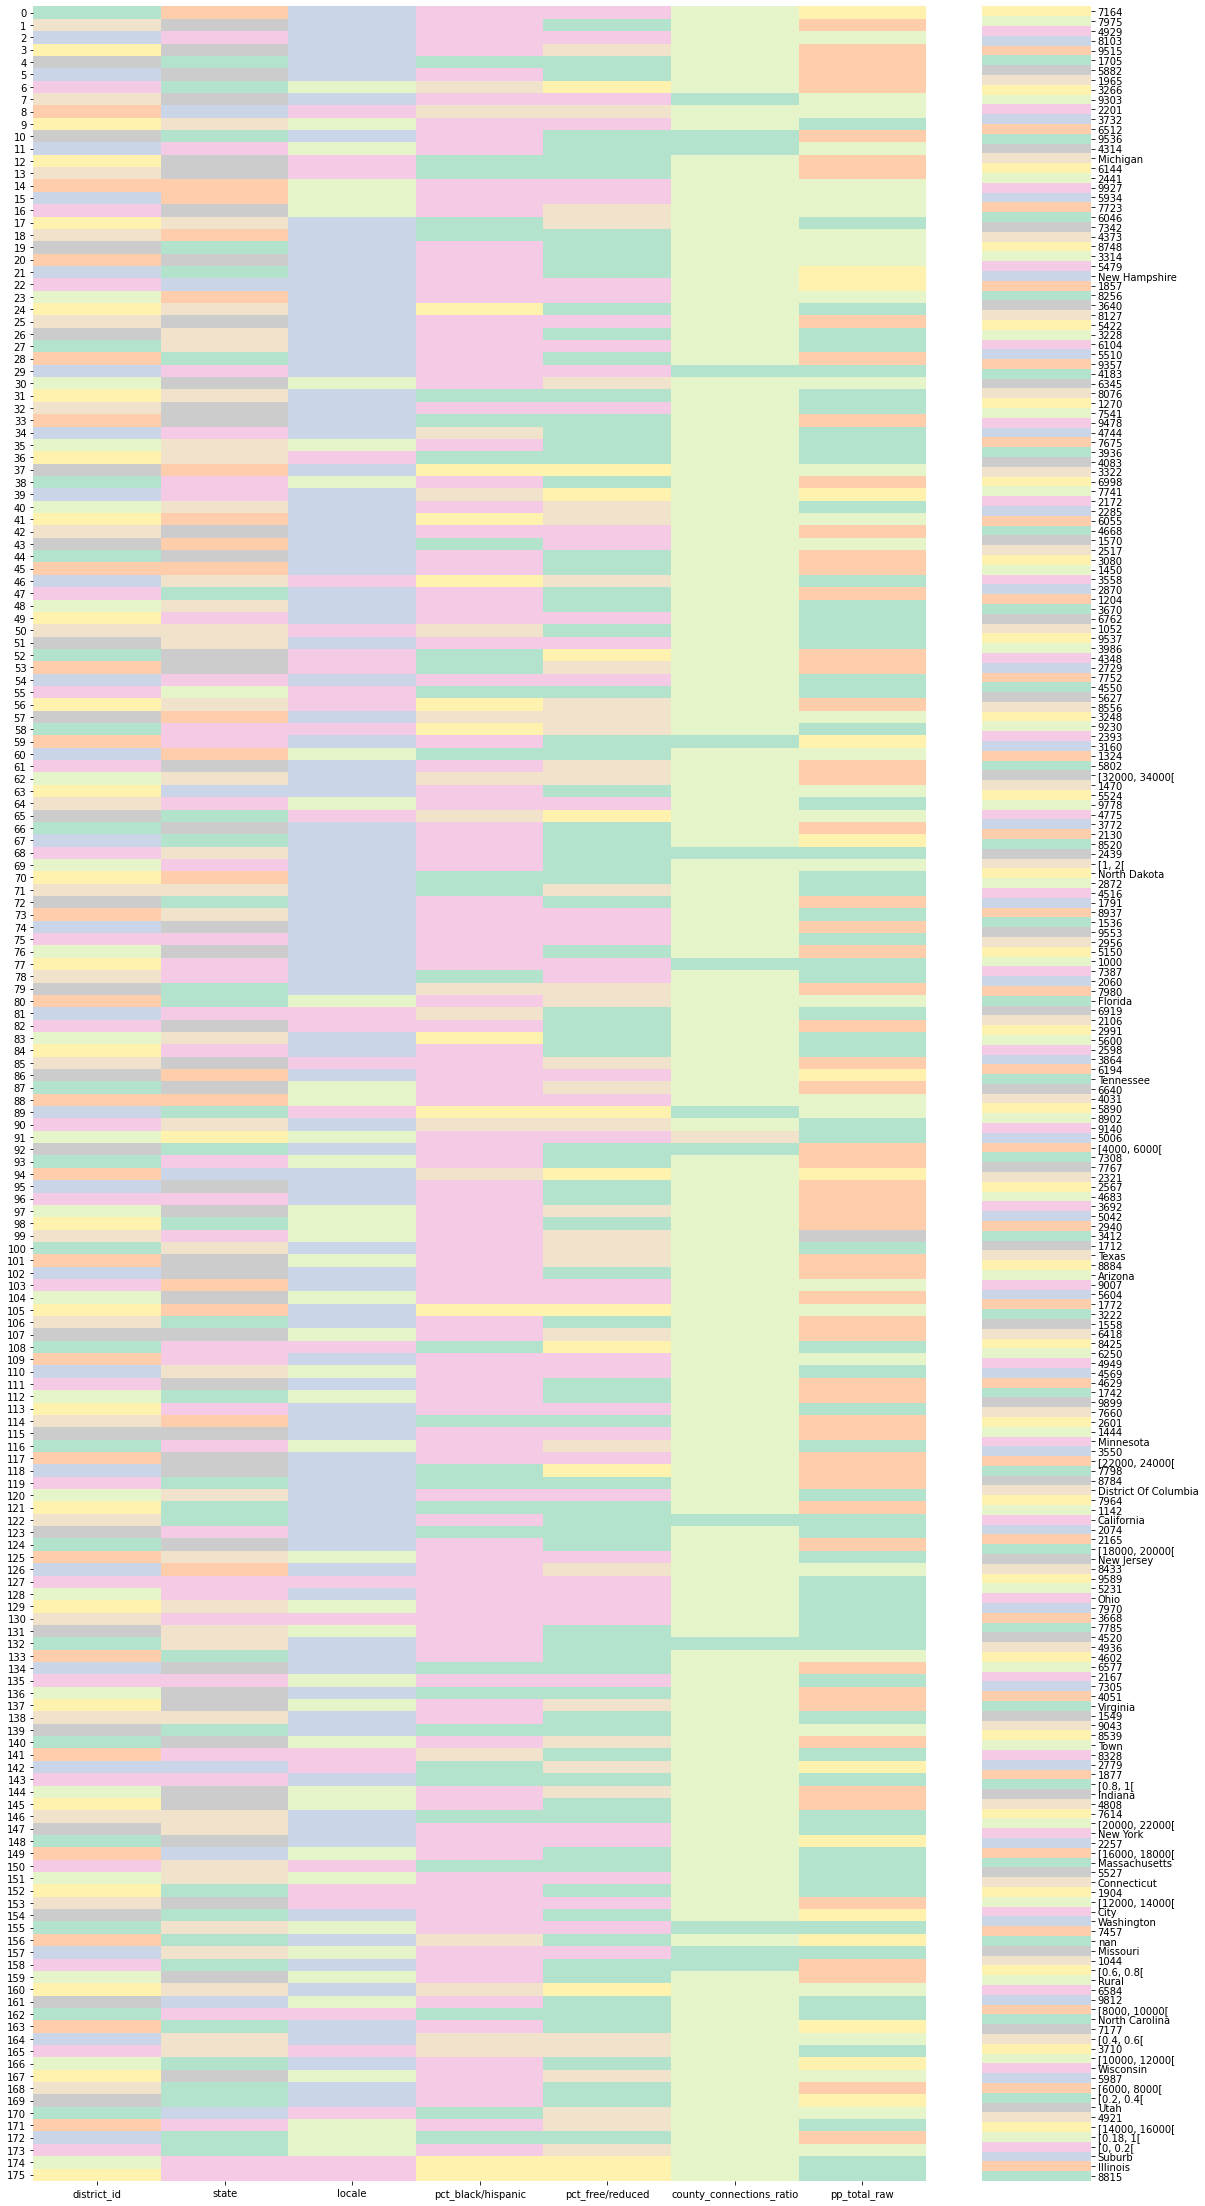

In [30]:
plt.figure(figsize=(20,40))
value_to_int = {j:i for i,j in enumerate(pd.unique(district_df.values.ravel()))} # like you did
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Pastel2", n) 
ax = sns.heatmap(district_df.replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Arizona'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Connecticut'),
  Text(3, 0, 'District Of Columbia'),
  Text(4, 0, 'Florida'),
  Text(5, 0, 'Illinois'),
  Text(6, 0, 'Indiana'),
  Text(7, 0, 'Massachusetts'),
  Text(8, 0, 'Michigan'),
  Text(9, 0, 'Minnesota'),
  Text(10, 0, 'Missouri'),
  Text(11, 0, 'New Hampshire'),
  Text(12, 0, 'New Jersey'),
  Text(13, 0, 'New York'),
  Text(14, 0, 'North Carolina'),
  Text(15, 0, 'North Dakota'),
  Text(16, 0, 'Ohio'),
  Text(17, 0, 'Tennessee'),
  Text(18, 0, 'Texas'),
  Text(19, 0, 'Utah'),
  Text(20, 0, 'Virginia'),
  Text(21, 0, 'Washington'),
  Text(22, 0, 'Wisconsin')])

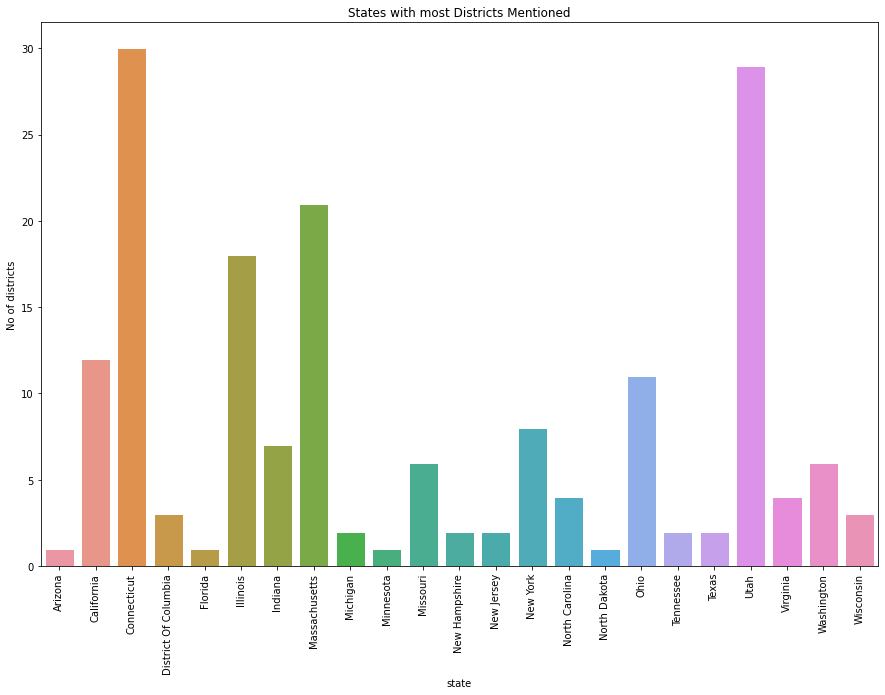

In [31]:
states = district_df.groupby(by ='state').count()[['district_id']]
plt.figure(figsize=(15,10))
plt.title("States with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('States')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=states.index,y=list(states['district_id']))
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'City'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'Suburb'),
  Text(3, 0, 'Town')])

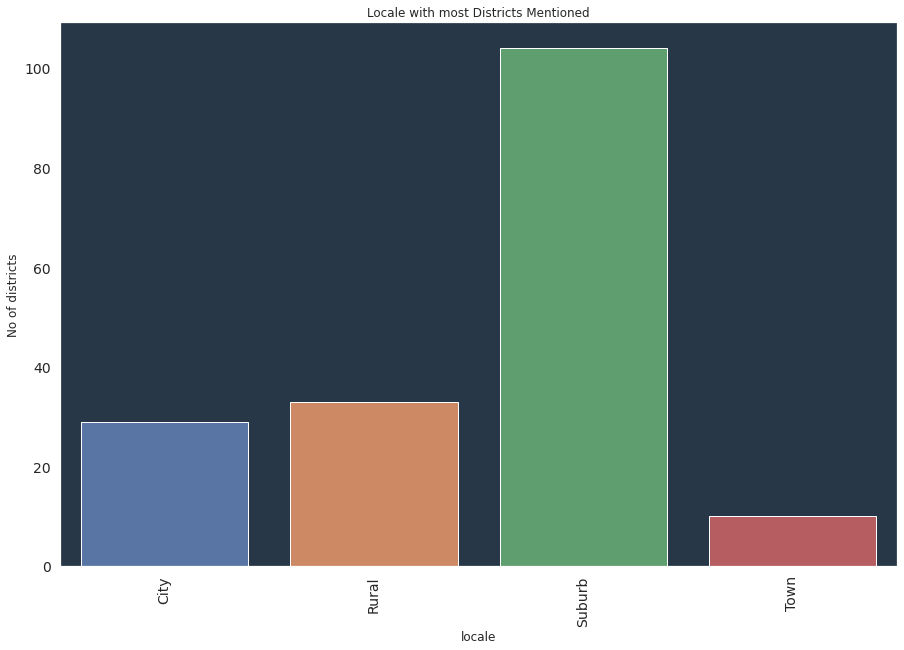

In [32]:
locale=district_df.groupby(by ='locale').count()[['district_id']]
plt.figure(figsize=(15,10))
plt.title("Locale with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('No. of locale mentioned')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=locale.index,y=list(locale['district_id']))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '[0, 0.2['),
  Text(1, 0, '[0.2, 0.4['),
  Text(2, 0, '[0.4, 0.6['),
  Text(3, 0, '[0.6, 0.8['),
  Text(4, 0, '[0.8, 1[')])

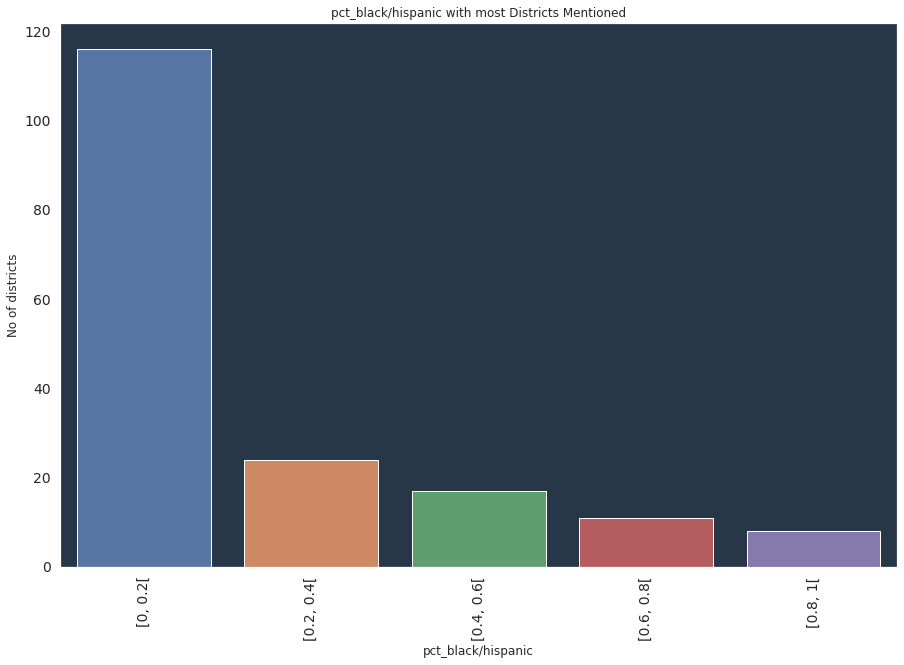

In [33]:
black_hispanic=district_df.groupby(by ='pct_black/hispanic').count()[['district_id']]
plt.figure(figsize=(15,10))
plt.title("pct_black/hispanic with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('No. of pct_black/hispanic mentioned')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=black_hispanic.index,y=list(black_hispanic['district_id']))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '[0, 0.2['),
  Text(1, 0, '[0.2, 0.4['),
  Text(2, 0, '[0.4, 0.6['),
  Text(3, 0, '[0.6, 0.8['),
  Text(4, 0, '[0.8, 1[')])

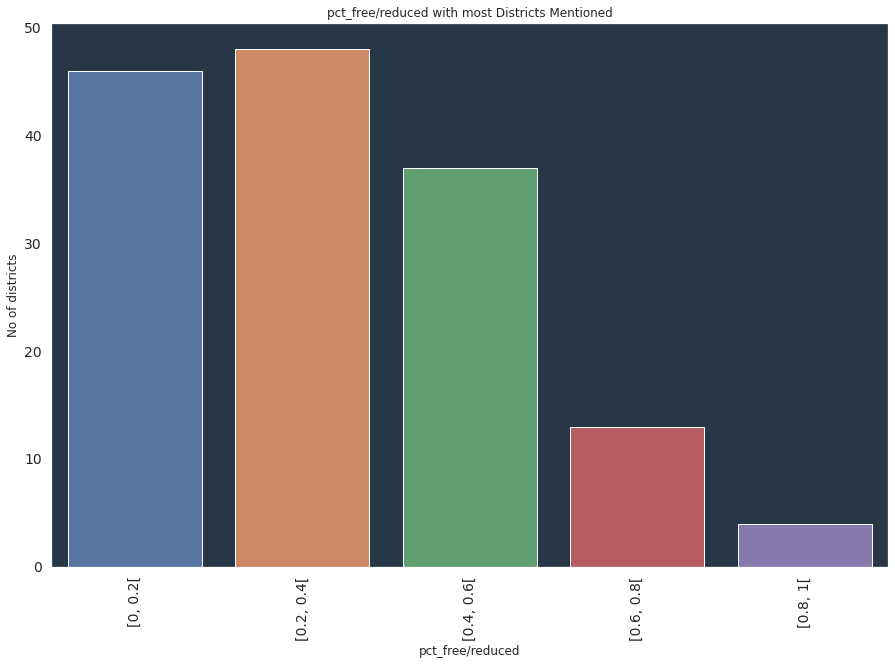

In [34]:
free_reduced=district_df.groupby(by ='pct_free/reduced').count()[['district_id']]
plt.figure(figsize=(15,10))
plt.title("pct_free/reduced with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('No. of pct_black/hispanic mentioned')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=free_reduced.index,y=list(free_reduced['district_id']))
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, '[0.18, 1['), Text(1, 0, '[1, 2[')])

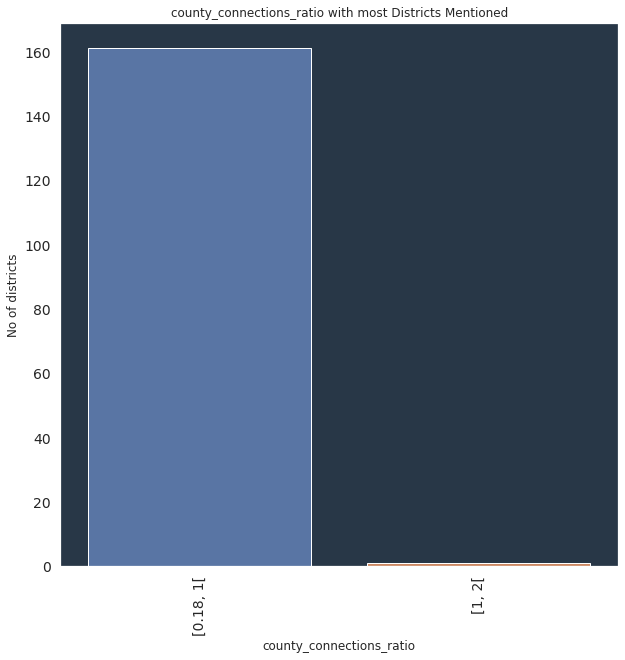

In [35]:
# county_connections_ratio

county_connection=district_df.groupby(by ='county_connections_ratio').count()[['district_id']]
plt.figure(figsize=(10,10))
plt.title("county_connections_ratio with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('No. of county_connections_ratio mentioned')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=county_connection.index,y=list(county_connection['district_id']))
plt.xticks(rotation=90)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.p

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Illinois'),
  Text(1, 0, 'Utah'),
  Text(2, 0, 'Wisconsin'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Missouri'),
  Text(5, 0, 'Washington'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Massachusetts'),
  Text(8, 0, 'New York'),
  Text(9, 0, 'Indiana'),
  Text(10, 0, 'Virginia'),
  Text(11, 0, 'Ohio'),
  Text(12, 0, 'New Jersey'),
  Text(13, 0, 'California'),
  Text(14, 0, 'District Of Columbia'),
  Text(15, 0, 'Minnesota'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Texas'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Florida'),
  Text(20, 0, 'North Dakota'),
  Text(21, 0, 'New Hampshire'),
  Text(22, 0, 'Michigan')])

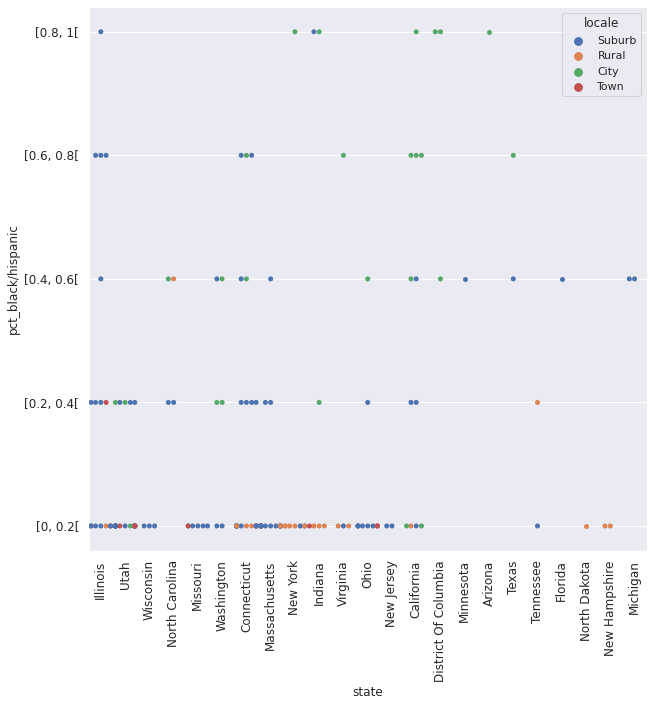

In [36]:
plt.figure(figsize=(10,10))
sns.set(rc={'xtick.labelsize':12,'ytick.labelsize':12,'axes.labelsize':12})
sns.swarmplot(x="state", y="pct_black/hispanic", hue="locale", data=district_df)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Illinois'),
  Text(1, 0, 'Utah'),
  Text(2, 0, 'Wisconsin'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Missouri'),
  Text(5, 0, 'Washington'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Massachusetts'),
  Text(8, 0, 'New York'),
  Text(9, 0, 'Indiana'),
  Text(10, 0, 'Virginia'),
  Text(11, 0, 'Ohio'),
  Text(12, 0, 'New Jersey'),
  Text(13, 0, 'California'),
  Text(14, 0, 'District Of Columbia'),
  Text(15, 0, 'Minnesota'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Texas'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Florida'),
  Text(20, 0, 'North Dakota'),
  Text(21, 0, 'New Hampshire'),
  Text(22, 0, 'Michigan')])

<Figure size 720x720 with 0 Axes>

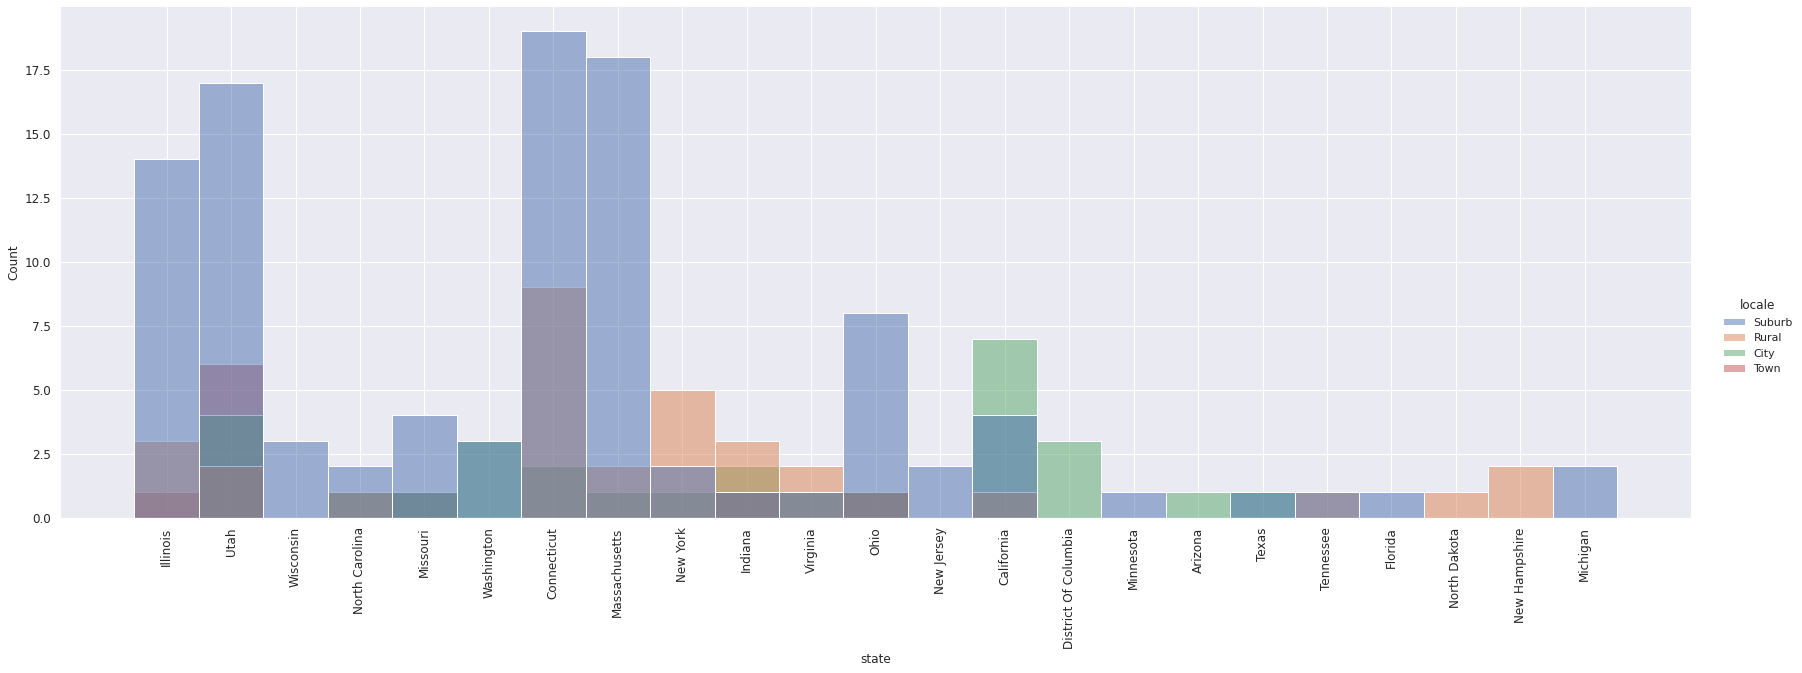

In [37]:
#distribution of state and locale
plt.figure(figsize=(10,10))
sns.displot(data=district_df, x='state', hue= 'locale', height=8, aspect=3)
plt.xticks(rotation=90)

In [38]:
pct_black_hispanic = district_df['pct_black/hispanic'].str.split(",",n=1,expand=True)
# separating pct_black and pct_hispanic
district_df['pct_black']=pct_black_hispanic[0].str.replace('[','',regex=True)
district_df['pct_hispanic']= pct_black_hispanic[1].str.replace('[','',regex=True)
# converting pct_black and pct_hispanic to numeric
district_df['pct_black']=pd.to_numeric(district_df['pct_black'])
district_df['pct_hispanic']=pd.to_numeric(district_df['pct_hispanic'])
district_df['pct_black_and_hispanic']=(district_df['pct_black'] + district_df['pct_hispanic'])/2



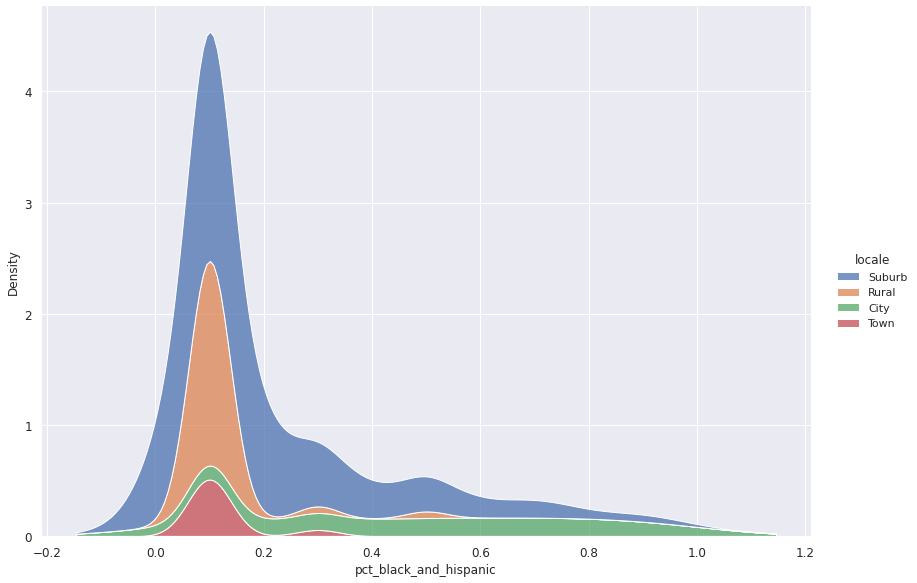

In [39]:
sns.displot(data=district_df, x='pct_black_and_hispanic', hue='locale',kind='kde',multiple="stack",height=8.27, aspect=11.7/8.27)


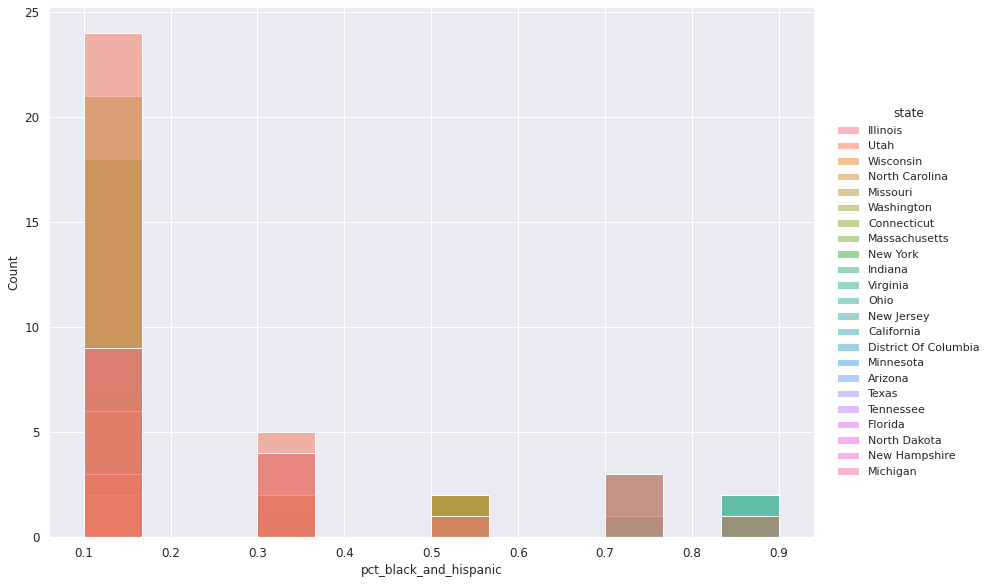

In [40]:
sns.displot(data=district_df, x="pct_black_and_hispanic", hue='state', height=8.27, aspect=11.7/8.27)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



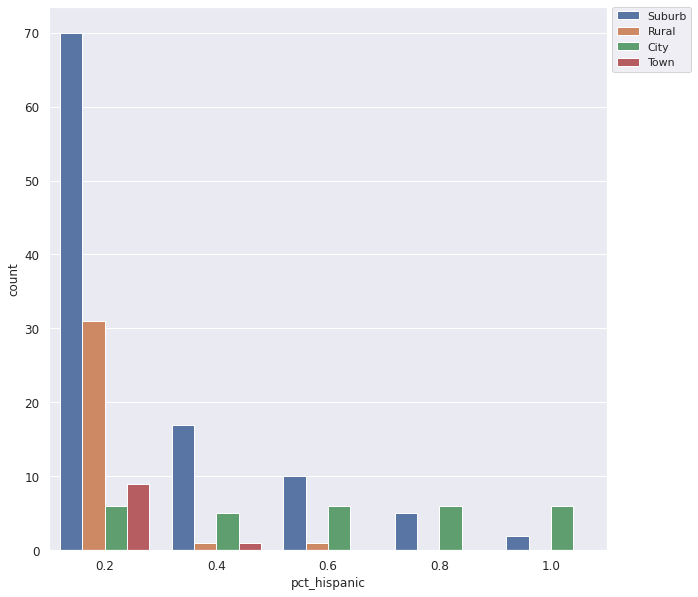

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(district_df['pct_hispanic'],hue=district_df["locale"])
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



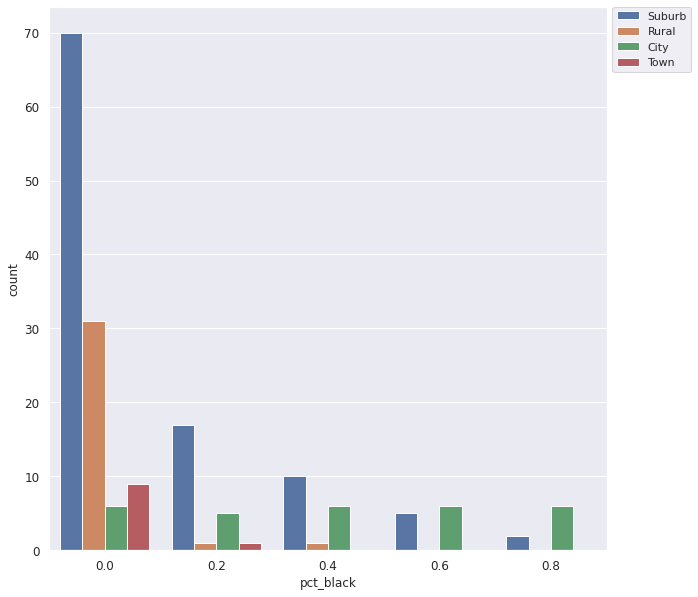

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(district_df['pct_black'],hue=district_df["locale"])
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

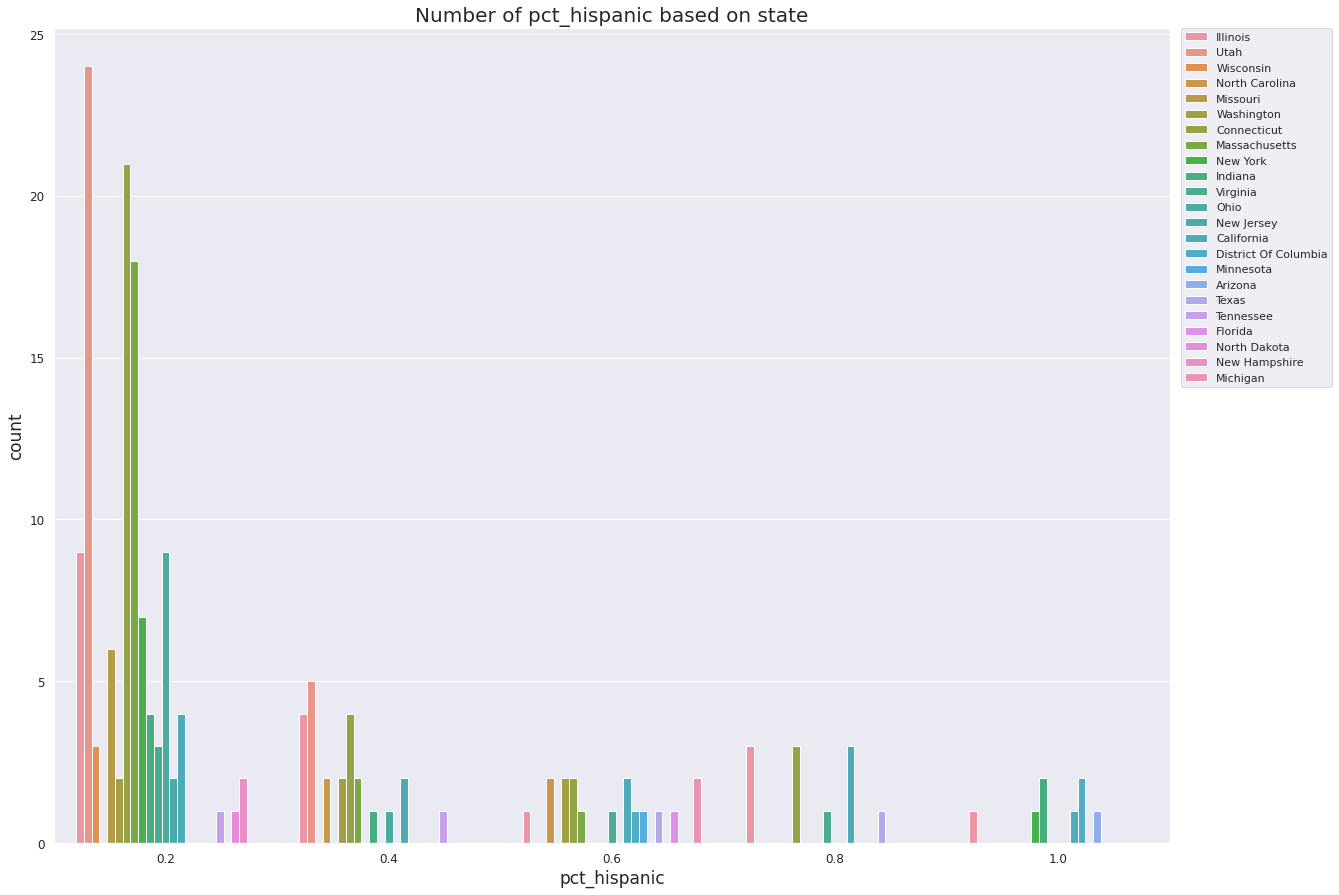

In [43]:
plt.figure(figsize = (20,15))
ax=sns.countplot(x = "pct_hispanic", data = district_df, hue="state")
ax.set_title("Number of pct_hispanic based on state", fontsize = 20)
plt.xlabel("pct_hispanic",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

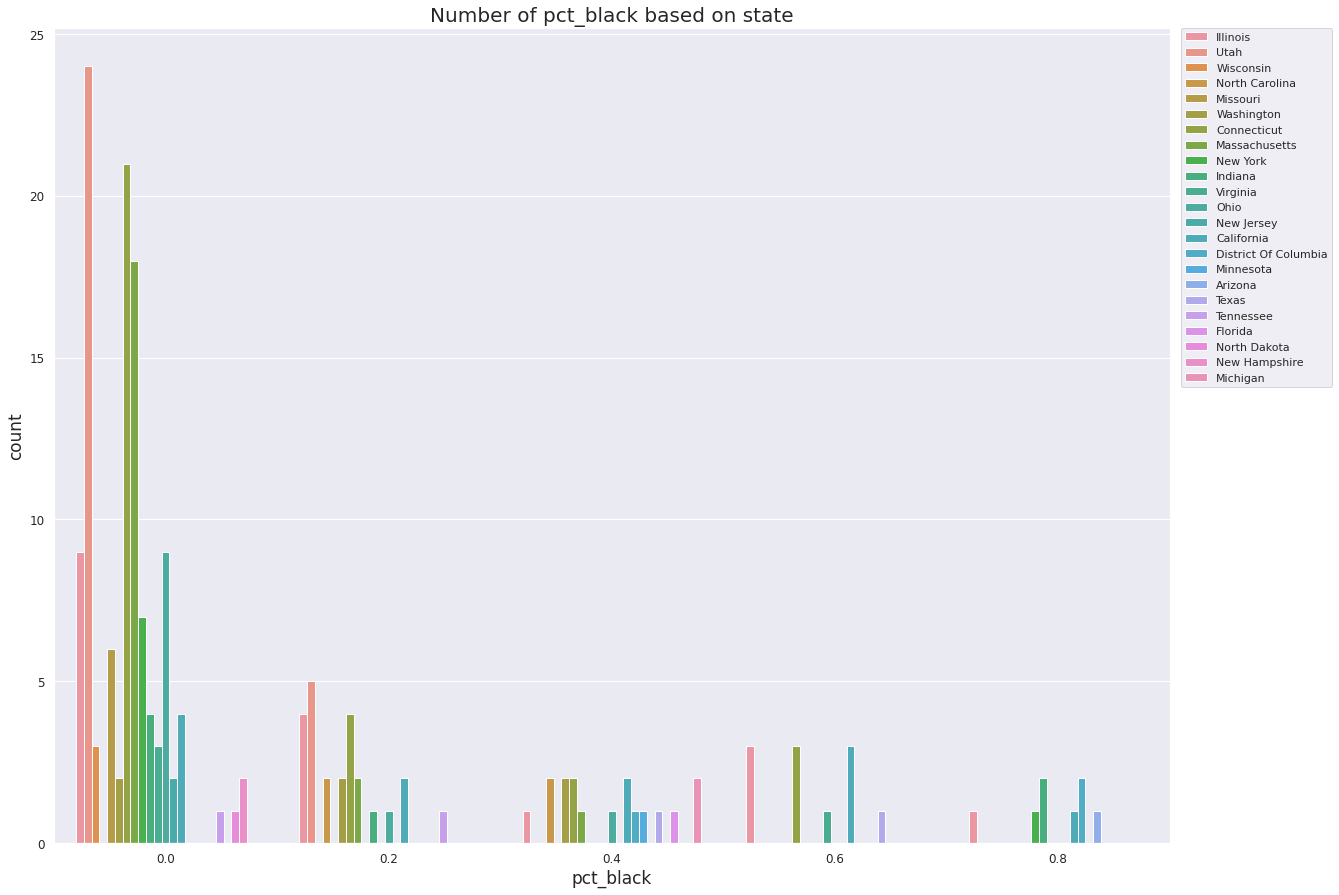

In [44]:
plt.figure(figsize = (20,15))
ax=sns.countplot(x = "pct_black", data = district_df, hue="state")
ax.set_title("Number of pct_black based on state", fontsize = 20)
plt.xlabel("pct_black",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

In [45]:
# process and separate pct_free/reduced
pct_free_reduced = district_df['pct_free/reduced'].str.split(",",n=1,expand=True)
# extract pct_free and pct_reduced
district_df['pct_free']=pct_free_reduced[0].str.replace('[','',regex=True)
district_df['pct_reduced']= pct_free_reduced[1].str.replace('[','',regex=True)
# convert pct_free and pct_reduced to numeric
district_df['pct_free']=pd.to_numeric(district_df['pct_free'])
district_df['pct_reduced']=pd.to_numeric(district_df['pct_reduced'])

district_df['pct_free'].fillna(district_df['pct_free'].median(), inplace=True)
district_df['pct_reduced'].fillna(district_df['pct_reduced'].median(), inplace=True)
#combine pct_free and pct_reduced with mean value
district_df['pct_free_and_reduced']=(district_df['pct_free'] + district_df['pct_reduced'])/2

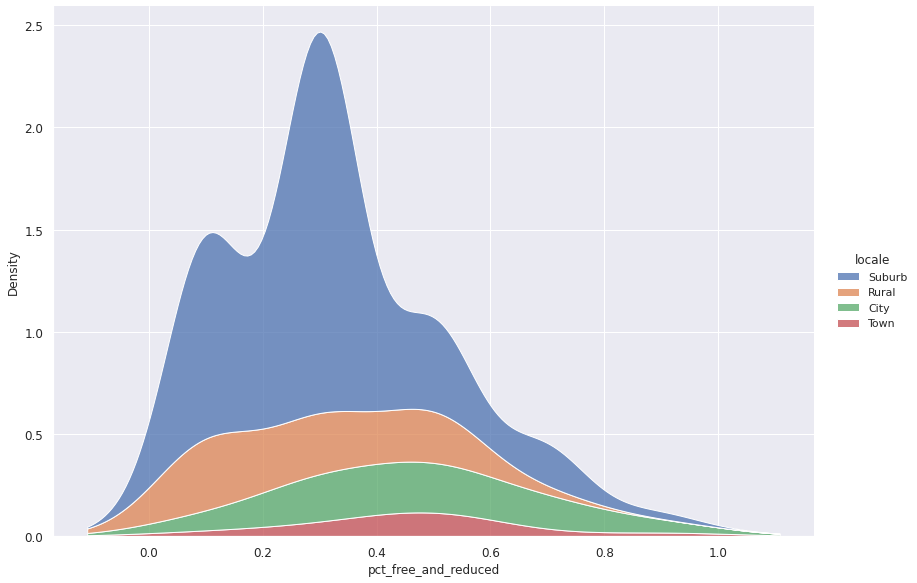

In [46]:
sns.displot(data=district_df, x='pct_free_and_reduced', hue='locale',kind='kde',multiple="stack",height=8.27, aspect=11.7/8.27)

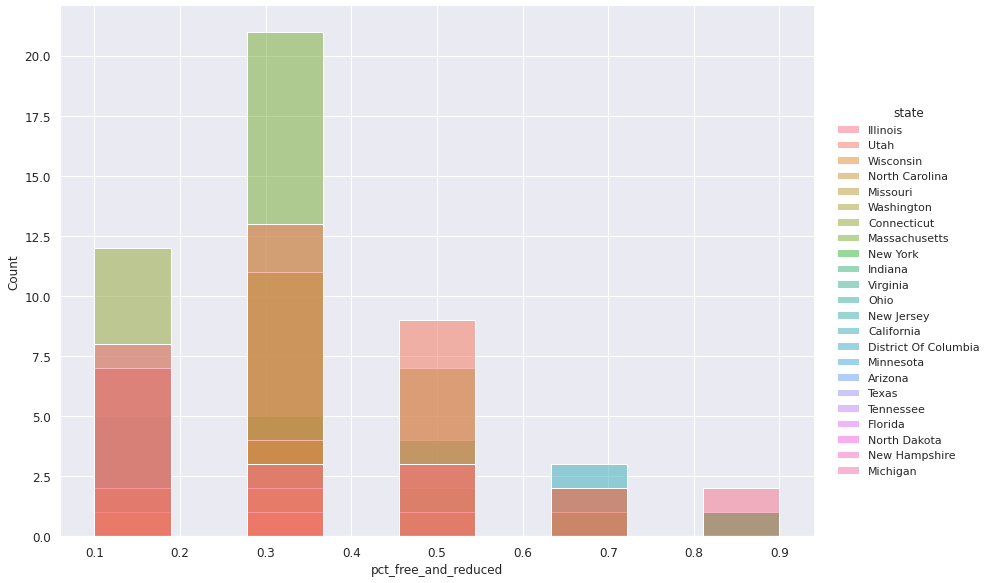

In [47]:
sns.displot(data=district_df, x="pct_free_and_reduced", hue='state', height=8.27, aspect=11.7/8.27)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



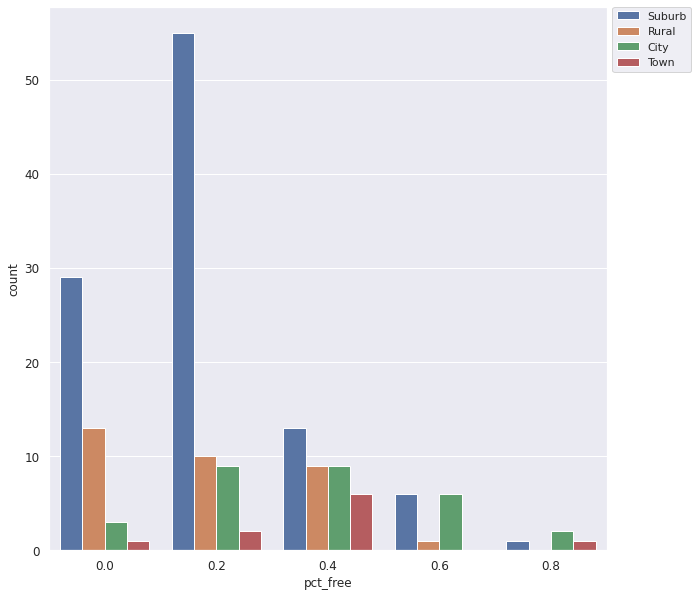

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(district_df['pct_free'],hue=district_df["locale"])
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



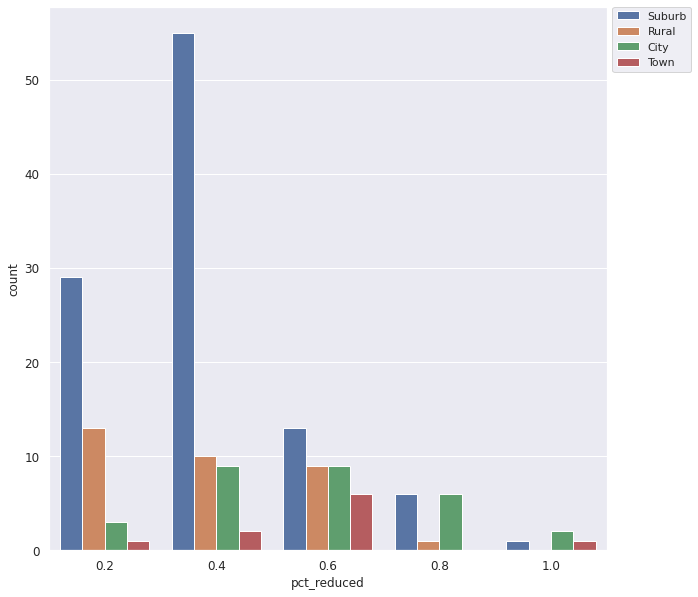

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(district_df['pct_reduced'],hue=district_df["locale"])
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

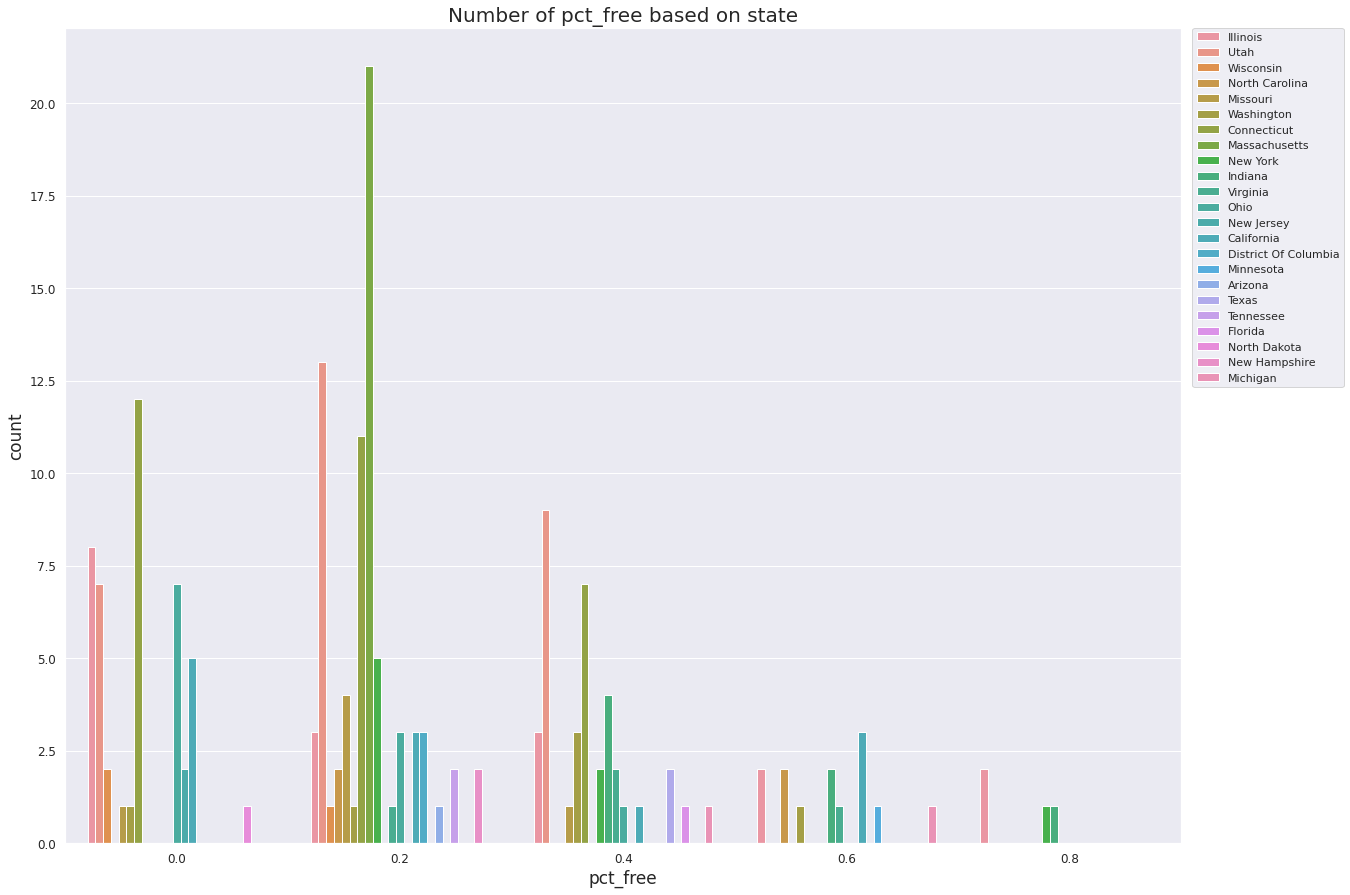

In [50]:
plt.figure(figsize = (20,15))
ax=sns.countplot(x = "pct_free", data = district_df, hue="state")
ax.set_title("Number of pct_free based on state", fontsize = 20)
plt.xlabel("pct_free",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

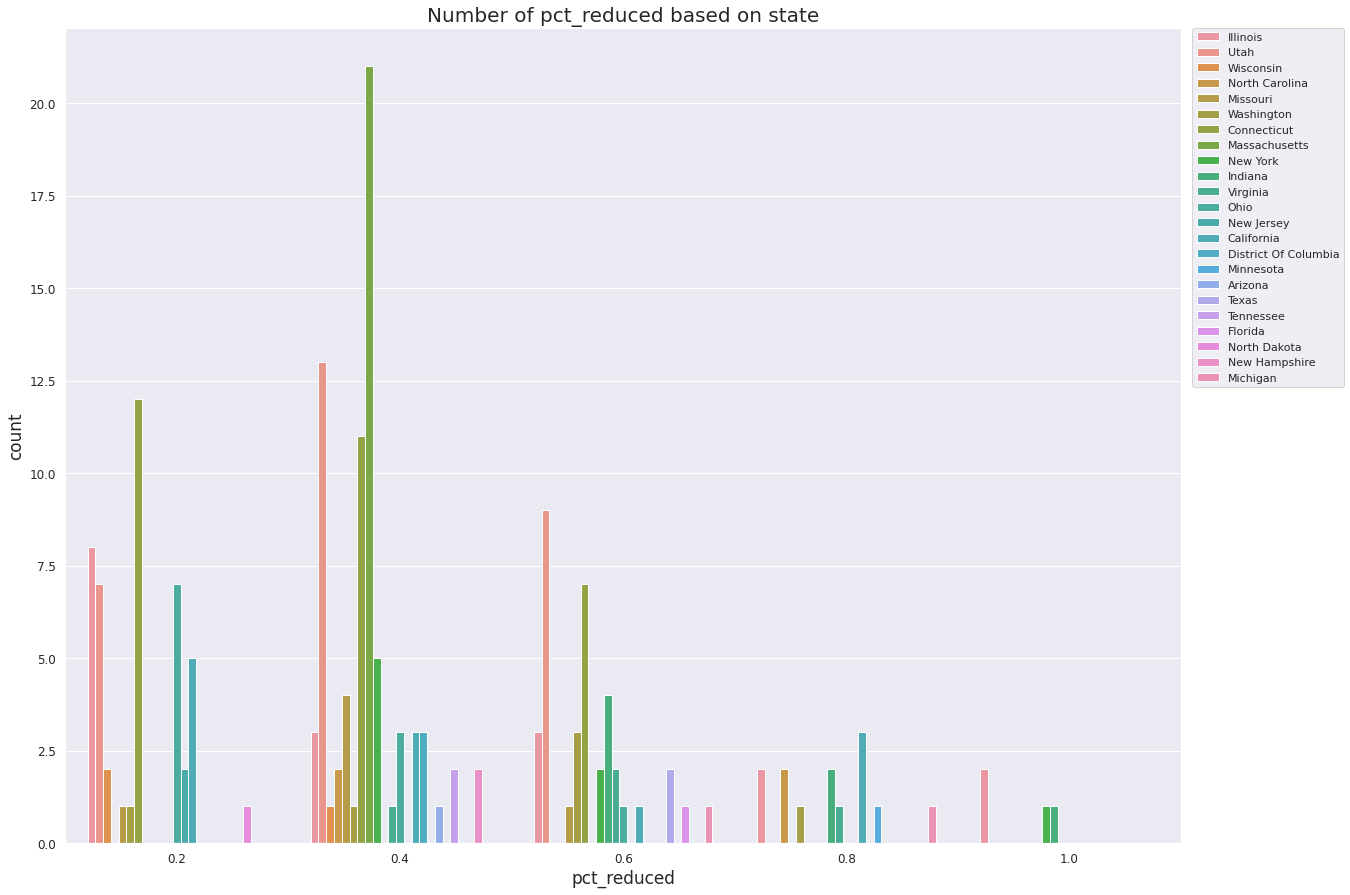

In [51]:
plt.figure(figsize = (20,15))
ax=sns.countplot(x = "pct_reduced", data = district_df, hue="state")
ax.set_title("Number of pct_reduced based on state", fontsize = 20)
plt.xlabel("pct_reduced",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

In [52]:
state_abb = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [53]:
district_df['state_abb'] = district_df['state'].map(state_abb)
fig = go.Figure()
layout = dict(
    title_text = "Count of districts in the available States",
    title_font = dict(
            family = "sans-seriff",
            size = 30,
            color = "darkblue"
            ),
    geo_scope = 'usa'
)

fig.add_trace(
    go.Choropleth(
        locations = district_df['state_abb'].value_counts().to_frame().reset_index()['index'],
        zmax = 1,
        z = district_df['state_abb'].value_counts().to_frame().reset_index()['state_abb'],
        locationmode = 'USA-states',
        marker_line_color = 'white',
        geo = 'geo',
        colorscale = "Reds", 
    )
)
fig.update_layout(layout)   
fig.show()

# Exploring the engagement data 

In [54]:
fig = ff.create_table(engagement_df.head(5),height_constant=50)
fig.update_layout(width=1000, height=400)
fig.show()

In [55]:
# Using color scales in table
colorscale = [[0, 'magenta'],[.5, '#DCE775'],[1, '#C0CA33']]
fig = ff.create_table(engagement_df.tail(5),height_constant=50,colorscale=colorscale)
fig.update_layout(width=1000, height=400)
fig.show()

## Time Attribute analysis 

In [56]:
engagement_df['month'] = pd.DatetimeIndex(engagement_df['time']).month
engagement_df['day'] = pd.DatetimeIndex(engagement_df['time']).day

In [57]:
status = ['1','2','3','4','5','6','7','8','9','10','11','12']
colors = ['#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#E1396C','C0CA33']
data = go.Pie(
values= engagement_df['month'].value_counts(),
labels= status,
marker=dict(colors=colors),
textinfo='label+value+percent'
)
layout = go.Layout(
title=dict(text = "Engagement during Month",x=0.46,y=0.95,font_size=20)
)
fig = go.Figure(data=data,layout=layout)
fig.show()

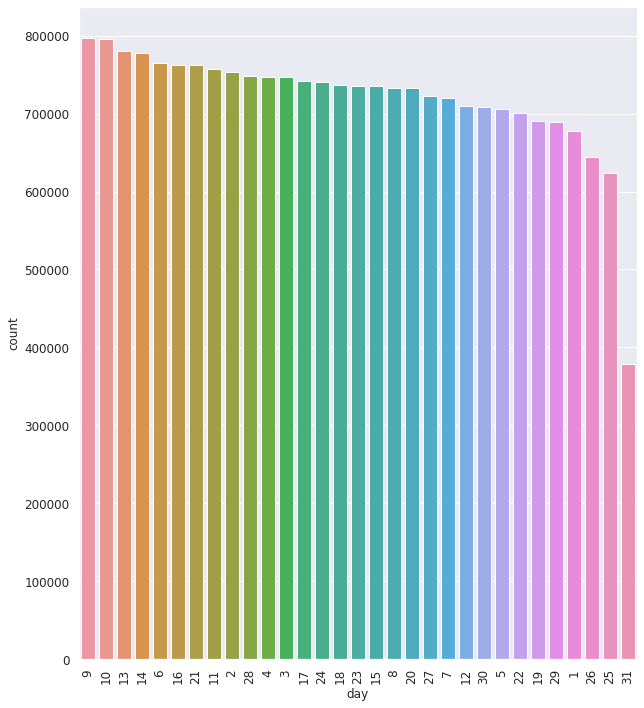

In [58]:

plt.figure(figsize=(10,12))
sns.countplot(x ='day',data = engagement_df,order=engagement_df['day'].value_counts().index)
plt.xticks(rotation=90)
plt.show()